# Movielens Case Study

**DESCRIPTION**

**Background of Problem Statement :**

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

**Problem Objective :**

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

**Domain:** Entertainment

**Analysis Tasks to be performed:**

- Import the three datasets
- Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
- Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
  1. User Age Distribution
  2. User rating of the movie “Toy Story”
  3. Top 25 movies by viewership rating
  4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

- Feature Engineering:

    Use column genres:

    1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
    2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
    3. Determine the features affecting the ratings of any particular movie.
    4. Develop an appropriate model to predict the movie ratings

**Dataset Description :**

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

**Ratings.dat**

    Format - UserID::MovieID::Rating::Timestamp
    
**Users.dat**

    Format -  UserID::Gender::Age::Occupation::Zip-code
    
**Movies.dat**

    Format - MovieID::Title::Genres

**###################################################################################################################**

**The DataFrame variables used in this project are as below**
- Users_df                    = Users.dat
- Movies_df                   = Movies.dat
- Ratings_df                  = Ratings.dat
- Master_Data                 = Marging of all the 3 raw dataset
- Master_DataModiGenr         = Modified "Genres" column in "Master_Data" with one hot encoding
- Master_DataModiGenrGendr    = Modified "Gender" column in "Master_DataModiGenr" with one hot encoding
- Master_DataModiGenrGendrAge = Modified "Age" column in "Master_DataModiGenrGendr" with LebelEncoder
- Master_DataClean            = Copy of "Master_DataModiGenrGendrAge" with selected feature for modeling
- Master_DataCleanCopy        = Copy of "Master_DataClean" with MinMaxScaler for X_Features

In [1]:
#import all the required packages for data import and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create different dataset column headers
Ratings_header = "UserID::MovieID::Rating::Timestamp".split("::")
Users_header = "UserID::Gender::Age::Occupation::Zip-code".split("::")
Movies_header = "MovieID::Title::Genres".split("::")

print('Ratings_header', Ratings_header)
print('Users_header',Users_header)
print('Movies_header',Movies_header)

Ratings_header ['UserID', 'MovieID', 'Rating', 'Timestamp']
Users_header ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
Movies_header ['MovieID', 'Title', 'Genres']


In [3]:
#Import the 3 dataset and assign the headers
Users_df = pd.read_csv('users.dat', sep='::', names = Users_header, engine ='python')
Movies_df = pd.read_csv('movies.dat', sep='::', names = Movies_header, engine ='python')
Ratings_df = pd.read_csv('ratings.dat', sep='::', names = Ratings_header, parse_dates=['Timestamp'], engine ='python')

In [4]:
# view the fist 5 data of Users_df 
Users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
#view the shape of the Users_df
Users_df.shape

(6040, 5)

In [6]:
# view the fist 5 data of Movies_df 
Movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
#view the shape of the Movies_df
Movies_df.shape

(3883, 3)

In [8]:
# view the fist 5 data of Ratings_df 
Ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
#view the shape of the Ratings_df
Ratings_df.shape

(1000209, 4)

In [10]:
# Convert the epoch time to proper date time format
Ratings_dfCopy = Ratings_df.copy()
Ratings_dfCopy['Converted Date Time'] = pd.to_datetime(Ratings_dfCopy['Timestamp'],unit='s')
Ratings_dfCopy.head()

,UserID,MovieID,Rating,Timestamp,Converted Date Time
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


In [11]:
# Merge the Ratings_df and Movies_df data on MovieID
movie_rating_df = pd.merge(Movies_df,Ratings_df,on='MovieID')
movie_rating_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [12]:
#view the shape of movie_rating_df
movie_rating_df.shape

(1000209, 6)

In [13]:
# Merge the Users_df and movie_rating_df on UserID
Master_Data = pd.merge(movie_rating_df,Users_df, on='UserID')
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [14]:
#view the shape of Master_Data
Master_Data.shape

(1000209, 10)

In [15]:
#check if there is NaN value
Master_Data.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [16]:
#find if there is a Duplicate entry
duplicateDFRow = Master_Data[Master_Data.duplicated(['MovieID','UserID'])]
duplicateDFRow.shape

(0, 10)

**###################################################################################################################**

## EDA using visual representations (graphs or tables)

### 1. User Age Distribution

In [17]:
# group the data w.r.t "Age" and view the size of each group
age_group = Master_Data.groupby('Age').size()
age_group

Age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
dtype: int64

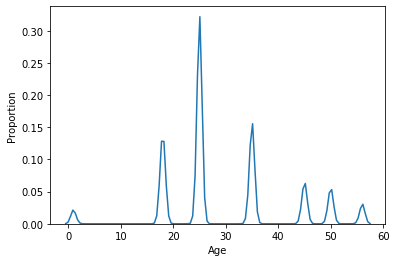

In [18]:
# density plot to view the data distribution w.r.t "Age" group
plt.ylabel('Proportion')
sns.distplot(Master_Data['Age'],hist=False)
plt.show()

>***From the above density plot it is evedent that most of the viewers are of Age Group = "25-34", since this age group has value of 25.***

### 1.1 Gender Distribution

In [19]:
#view the "Gender" distribution in Movie viewership
gender_group = Master_Data.groupby('Gender').size()
gender_group

Gender
F    246440
M    753769
dtype: int64

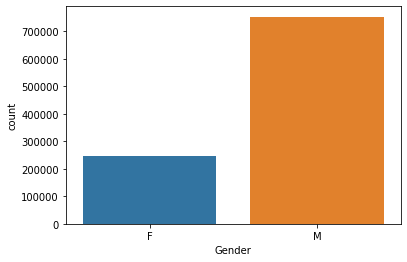

In [20]:
# count plot to view the data distribution w.r.t "Gender" group
sns.countplot(Master_Data.Gender)
plt.show()

>***The above distribution shows that most of the users are Males***


**###################################################################################################################**

### 2. User rating of the movie “Toy Story”

In [21]:
# Make the dataframe grouped by MovieID as movie id is unique
grouped_movie = Master_Data.groupby(['MovieID'])
ToyStory_Grp = grouped_movie.get_group(1) # getting only the Toy Story movie data whose movie id is 1
ToyStory_Grp.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [22]:
# find rating counts for Toy Story Movie
ToyStory_Grp['Rating'].value_counts()

4    835
5    820
3    345
2     61
1     16
Name: Rating, dtype: int64

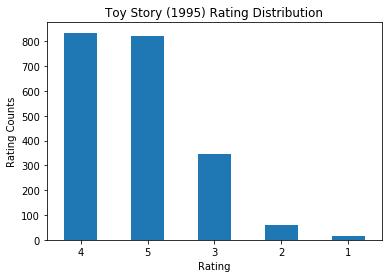

In [23]:
# Plot the rating counts for Toy Story Movie
plt.title('Toy Story (1995) Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Rating Counts')
ToyStory_Grp['Rating'].value_counts().plot(kind='bar')

# Plot 'x' on current axes and rotate label
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(0)
plt.show()

>***"Toy Story (1995)" has got Maximum number of 4 star ratings followed by 5 star ratings. Very less number of 1 and 2 star ratings.***

**###################################################################################################################**

### 3. Top 25 movies by viewership rating

In [24]:
# create a dataset grouped by 'MovieID'
movie_rating = Master_Data.groupby(['MovieID'], as_index=False)

#create a dataframe with calculated mean of every group's 'Rating'
average_movie_ratings = movie_rating.agg({'Rating':'mean'})

# sort the dataframe based on calculated mean 'Rating' in decending order and show 1st 25 value
top_25_movies = average_movie_ratings.sort_values('Rating', ascending=False).head(25)
top_25_movies

,MovieID,Rating
926,989,5.000000
3635,3881,5.000000
1652,1830,5.000000
3152,3382,5.000000
744,787,5.000000
3054,3280,5.000000
3367,3607,5.000000
3010,3233,5.000000
2955,3172,5.000000
3414,3656,5.000000


In [25]:
#The below list shows top 25 movies by viewership data 
pd.merge(top_25_movies, Movies_df, how='left', on=['MovieID'])

,MovieID,Rating,Title,Genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


**###################################################################################################################**

### 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [26]:
# Find the list of all movie reviewed by user id = 2696
user2696_df = Master_Data[Master_Data['UserID'] == 2696]

user2696_df.shape  # Find the number of observation with user id = 2696

(20, 10)

In [27]:
# show the movie list which is rated by user id = 2696
list(user2696_df.Title)


['Client, The (1994)',
 'Lone Star (1996)',
 'Basic Instinct (1992)',
 'E.T. the Extra-Terrestrial (1982)',
 'Shining, The (1980)',
 'Back to the Future (1985)',
 'Cop Land (1997)',
 'L.A. Confidential (1997)',
 'Game, The (1997)',
 'I Know What You Did Last Summer (1997)',
 "Devil's Advocate, The (1997)",
 'Midnight in the Garden of Good and Evil (1997)',
 'Palmetto (1998)',
 'Wild Things (1998)',
 'Perfect Murder, A (1998)',
 'I Still Know What You Did Last Summer (1998)',
 'Psycho (1998)',
 'Lake Placid (1999)',
 'Talented Mr. Ripley, The (1999)',
 'JFK (1991)']

**###################################################################################################################**

## Feature Engineering: 

### 1. Find out all the unique genres

In [28]:
Master_Data['Genres'].describe(include='all')

count     1000209
unique        301
top        Comedy
freq       116883
Name: Genres, dtype: object

In [29]:
# define a empty list
genres = []

# create a list of all Genres available in the dataset
for string in Master_Data['Genres']:
    genres.extend(string.split('|'))

# print all Genres     
print("total number of Genres count with repetition: ",len(genres)) 

# create a unique list of Genres using set()
unique_genres = list(set(genres))
print("\nUnique number of Genres count: ",len(unique_genres))
print("\nThe Unique Genres list are: \n", unique_genres)

total number of Genres count with repetition:  2101815

Unique number of Genres count:  18

The Unique Genres list are: 
 ['Fantasy', 'Documentary', 'Musical', 'Drama', 'Animation', 'War', 'Film-Noir', 'Crime', 'Adventure', 'Sci-Fi', 'Thriller', 'Western', 'Horror', 'Comedy', 'Romance', 'Action', "Children's", 'Mystery']


**###################################################################################################################**

### 2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0)

In [30]:
# View the Master_Data 
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [31]:
#copy the Master_Data into another data frame
Master_DataModiGenr = Master_Data.copy()
print(id(Master_DataModiGenr))
print(id(Master_Data))

2417193326536
2417192972104


In [32]:
# The splited 'Genres' add in different feature columns and assign 1 or 0 for a particular movie

unique_genres.sort()          # sort the genres list 
for i in unique_genres:
    Master_DataModiGenr[i] = Master_DataModiGenr['Genres'].str.contains(i)*1

In [33]:
pd.set_option('display.max_columns', None)  # set option to view all the columns
Master_DataModiGenr.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


**###################################################################################################################**

### 3. Determine the features affecting the ratings of any particular movie.

In [34]:
#get the Gender counts
Master_Data['Gender'].value_counts()

M    753769
F    246440
Name: Gender, dtype: int64

In [35]:
# Converting a catagorical "Gender" variable to discrete numarical value
dummy_variable_1 = pd.get_dummies(Master_DataModiGenr["Gender"])

# renaming columns
dummy_variable_1.rename(columns={'F':'Gender_F', 'M':'Gender_M'}, inplace=True)
dummy_variable_1.head()


,Gender_F,Gender_M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [36]:
# merge "Master_DataModiGenr" and "dummy_variable_1" 
Master_DataModiGenrGendr = pd.concat([Master_DataModiGenr, dummy_variable_1], axis=1)

# drop original column "Gender" from "Master_DataModiGenrGendr"
Master_DataModiGenrGendr.drop("Gender", axis = 1, inplace=True)

In [37]:
# View the data distribustion of "Age" feature
Master_DataModiGenrGendr['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

In [38]:
# preprocess "Age" variable to sequencial value

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(Master_DataModiGenrGendr['Age'])
x_age = le.transform(Master_DataModiGenrGendr['Age'])


In [39]:
#create a copy of the dataset
Master_DataModiGenrGendrAge = Master_DataModiGenrGendr.copy()

# assign new label encode age "x_age" in "Master_DataModiGenrGendr" 
Master_DataModiGenrGendrAge['New Age'] = x_age

# drop original column "Age" from "Master_DataModiGenrGendrAge"
Master_DataModiGenrGendrAge.drop("Age", axis = 1, inplace=True)

Master_DataModiGenrGendrAge.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Occupation,Zip-code,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender_F,Gender_M,New Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,10,48067,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,10,48067,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,10,48067,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,10,48067,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,10,48067,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [40]:
# Checking the correlation of the "Master_Data" which affects Rating
Master_Data.corr()

,MovieID,UserID,Rating,Timestamp,Age,Occupation
MovieID,1.000000,-0.017739,-0.064042,0.041632,0.027575,0.008585
UserID,-0.017739,1.000000,0.012303,-0.490383,0.034688,-0.026698
Rating,-0.064042,0.012303,1.000000,-0.026770,0.056869,0.006753
Timestamp,0.041632,-0.490383,-0.026770,1.000000,-0.064562,0.015646
Age,0.027575,0.034688,0.056869,-0.064562,1.000000,0.078371
Occupation,0.008585,-0.026698,0.006753,0.015646,0.078371,1.000000


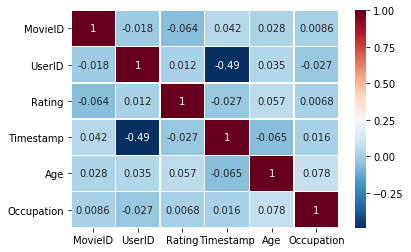

In [41]:
# plot the heat map to view the relation
sns.heatmap(Master_Data.corr(),linewidths=.5,annot=True,cmap='RdBu_r')
plt.show()

>*From the above **(Main Master_Data)** correlation matrix  "Rating" has some visible correlation with*
>- "Age"  = 0.057
>- "MovieID" = -0.064
>- "Timestamp" = -0.027

> *"Occupation" has very very low correlation. So we can ignore it.*

**==================================================================**

In [42]:
# Checking the correlation of the modified "Master_DataModiGenr" which affects Rating
Master_DataModiGenr.corr()

,MovieID,UserID,Rating,Timestamp,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,1.000000,-0.017739,-0.064042,0.041632,0.027575,0.008585,-0.042046,-0.082413,-0.014177,-0.071589,0.061667,-0.061896,-0.009544,-0.030856,-0.018792,-0.019655,0.057613,-0.059381,-0.028561,-0.118375,-0.011747,-0.058418,-0.081951,0.003940
UserID,-0.017739,1.000000,0.012303,-0.490383,0.034688,-0.026698,-0.002023,-0.000683,-0.007665,-0.004862,-0.003651,0.003469,-0.001064,0.006572,0.002212,0.004701,-0.001392,-0.000222,0.004334,0.006834,-0.003283,-0.001107,0.003502,0.004114
Rating,-0.064042,0.012303,1.000000,-0.026770,0.056869,0.006753,-0.047633,-0.036718,0.019670,-0.039829,-0.039622,0.033446,0.028098,0.122561,-0.023312,0.060259,-0.094353,0.015643,0.015848,0.009644,-0.044487,-0.004806,0.075688,0.007311
Timestamp,0.041632,-0.490383,-0.026770,1.000000,-0.064562,0.015646,-0.032990,-0.023252,0.000840,-0.000991,0.006064,-0.009597,0.009029,0.010374,-0.011237,-0.008664,-0.007079,0.000378,-0.006836,-0.004799,-0.024150,-0.011591,-0.014109,-0.006230
Age,0.027575,0.034688,0.056869,-0.064562,1.000000,0.078371,-0.030975,-0.016730,-0.047020,-0.052858,-0.044046,-0.007931,0.004407,0.063856,-0.024222,0.033495,-0.023901,0.005158,0.024308,0.017503,-0.010879,-0.014100,0.038446,0.038177
Occupation,0.008585,-0.026698,0.006753,0.015646,0.078371,1.000000,0.018347,0.014309,-0.003834,-0.006906,-0.006149,0.002821,-0.002689,-0.012326,0.001299,0.005246,0.001439,-0.007312,0.002421,-0.014018,0.026250,0.008981,0.010264,0.005924
Action,-0.042046,-0.002023,-0.047633,-0.032990,-0.030975,0.018347,1.000000,0.374961,-0.110294,-0.141314,-0.268092,0.088519,-0.052565,-0.202415,0.014551,-0.080288,-0.042733,-0.100432,-0.054084,-0.067830,0.319117,0.202756,0.135872,0.022242
Adventure,-0.082413,-0.000683,-0.036718,-0.023252,-0.016730,0.014309,0.374961,1.000000,0.004732,0.098283,-0.124960,-0.045924,-0.035109,-0.194570,0.227046,-0.014178,-0.057256,-0.022327,-0.043503,-0.024389,0.284190,-0.038423,0.016647,-0.011964
Animation,-0.014177,-0.007665,0.019670,0.000840,-0.047020,-0.003834,-0.110294,0.004732,1.000000,0.576204,0.018544,-0.062520,-0.018991,-0.154479,0.012025,0.037013,-0.049730,0.335231,-0.042488,-0.054540,-0.055526,-0.085713,-0.046114,-0.030908
Children's,-0.071589,-0.004862,-0.039829,-0.000991,-0.052858,-0.006906,-0.141314,0.098283,0.576204,1.000000,0.058711,-0.081977,-0.024901,-0.135707,0.263280,-0.038033,-0.077099,0.312567,-0.052786,-0.084550,-0.038844,-0.132642,-0.066539,-0.031269


>*From the above **(Master_DataModiGenr)** correlation matrix  "Rating" has some visible correlation with* 
>- "Age"  = 0.0568
>- "Timestamp" = -0.0267
>- "MovieID" = -0.064
>- "Action" = -0.0476
>- "Adventure" = -0.037 
>- "Children's" = -0.0398
>- "Comedy" = -0.0396
>- "Crime" = 0.033
>- "Drama" = 0.123
>- "Documentary" = 0.028
>- "Film-Noir" = 0.060
>- "Horror" = -0.094
>- "Sci-Fi" = -0.044
>- "War" = 0.076

>*"Occupation" has very very low correlation and others also doesn't have very good correlation. So we can ignore it.*

**===============================================================**

In [43]:
# Checking the correlation of the modified "Master_DataModiGenrGendr" which affects Rating

Master_DataModiGenrGendr.corr()


,MovieID,UserID,Rating,Timestamp,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender_F,Gender_M
MovieID,1.000000,-0.017739,-0.064042,0.041632,0.027575,0.008585,-0.042046,-0.082413,-0.014177,-0.071589,0.061667,-0.061896,-0.009544,-0.030856,-0.018792,-0.019655,0.057613,-0.059381,-0.028561,-0.118375,-0.011747,-0.058418,-0.081951,0.003940,-0.021626,0.021626
UserID,-0.017739,1.000000,0.012303,-0.490383,0.034688,-0.026698,-0.002023,-0.000683,-0.007665,-0.004862,-0.003651,0.003469,-0.001064,0.006572,0.002212,0.004701,-0.001392,-0.000222,0.004334,0.006834,-0.003283,-0.001107,0.003502,0.004114,0.035042,-0.035042
Rating,-0.064042,0.012303,1.000000,-0.026770,0.056869,0.006753,-0.047633,-0.036718,0.019670,-0.039829,-0.039622,0.033446,0.028098,0.122561,-0.023312,0.060259,-0.094353,0.015643,0.015848,0.009644,-0.044487,-0.004806,0.075688,0.007311,0.019861,-0.019861
Timestamp,0.041632,-0.490383,-0.026770,1.000000,-0.064562,0.015646,-0.032990,-0.023252,0.000840,-0.000991,0.006064,-0.009597,0.009029,0.010374,-0.011237,-0.008664,-0.007079,0.000378,-0.006836,-0.004799,-0.024150,-0.011591,-0.014109,-0.006230,0.008895,-0.008895
Age,0.027575,0.034688,0.056869,-0.064562,1.000000,0.078371,-0.030975,-0.016730,-0.047020,-0.052858,-0.044046,-0.007931,0.004407,0.063856,-0.024222,0.033495,-0.023901,0.005158,0.024308,0.017503,-0.010879,-0.014100,0.038446,0.038177,0.003189,-0.003189
Occupation,0.008585,-0.026698,0.006753,0.015646,0.078371,1.000000,0.018347,0.014309,-0.003834,-0.006906,-0.006149,0.002821,-0.002689,-0.012326,0.001299,0.005246,0.001439,-0.007312,0.002421,-0.014018,0.026250,0.008981,0.010264,0.005924,-0.114974,0.114974
Action,-0.042046,-0.002023,-0.047633,-0.032990,-0.030975,0.018347,1.000000,0.374961,-0.110294,-0.141314,-0.268092,0.088519,-0.052565,-0.202415,0.014551,-0.080288,-0.042733,-0.100432,-0.054084,-0.067830,0.319117,0.202756,0.135872,0.022242,-0.094380,0.094380
Adventure,-0.082413,-0.000683,-0.036718,-0.023252,-0.016730,0.014309,0.374961,1.000000,0.004732,0.098283,-0.124960,-0.045924,-0.035109,-0.194570,0.227046,-0.014178,-0.057256,-0.022327,-0.043503,-0.024389,0.284190,-0.038423,0.016647,-0.011964,-0.038645,0.038645
Animation,-0.014177,-0.007665,0.019670,0.000840,-0.047020,-0.003834,-0.110294,0.004732,1.000000,0.576204,0.018544,-0.062520,-0.018991,-0.154479,0.012025,0.037013,-0.049730,0.335231,-0.042488,-0.054540,-0.055526,-0.085713,-0.046114,-0.030908,0.017719,-0.017719
Children's,-0.071589,-0.004862,-0.039829,-0.000991,-0.052858,-0.006906,-0.141314,0.098283,0.576204,1.000000,0.058711,-0.081977,-0.024901,-0.135707,0.263280,-0.038033,-0.077099,0.312567,-0.052786,-0.084550,-0.038844,-0.132642,-0.066539,-0.031269,0.031662,-0.031662


>*From the above **(Master_DataModiGenrGendr)** correlation matrix  "Rating" has some visible correlation with (considered >=0.025)* 
>- "Age"  = 0.0568
>- "Timestamp" = -0.0267
>- "MovieID" = -0.064
>- "Action" = -0.0476
>- "Adventure" = -0.037 
>- "Children's" = -0.0398
>- "Comedy" = -0.0396
>- "Crime" = 0.033
>- "Drama" = 0.123
>- "Documentary" = 0.028
>- "Film-Noir" = 0.060
>- "Horror" = -0.094
>- "Sci-Fi" = -0.044
>- "War" = 0.076


**==================================================================**

In [44]:
# Checking the correlation of the modified "Master_DataModiGenrGendrAge" which affects Rating

Master_DataModiGenrGendrAge.corr()

,MovieID,UserID,Rating,Timestamp,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender_F,Gender_M,New Age
MovieID,1.000000,-0.017739,-0.064042,0.041632,0.008585,-0.042046,-0.082413,-0.014177,-0.071589,0.061667,-0.061896,-0.009544,-0.030856,-0.018792,-0.019655,0.057613,-0.059381,-0.028561,-0.118375,-0.011747,-0.058418,-0.081951,0.003940,-0.021626,0.021626,0.028442
UserID,-0.017739,1.000000,0.012303,-0.490383,-0.026698,-0.002023,-0.000683,-0.007665,-0.004862,-0.003651,0.003469,-0.001064,0.006572,0.002212,0.004701,-0.001392,-0.000222,0.004334,0.006834,-0.003283,-0.001107,0.003502,0.004114,0.035042,-0.035042,0.033042
Rating,-0.064042,0.012303,1.000000,-0.026770,0.006753,-0.047633,-0.036718,0.019670,-0.039829,-0.039622,0.033446,0.028098,0.122561,-0.023312,0.060259,-0.094353,0.015643,0.015848,0.009644,-0.044487,-0.004806,0.075688,0.007311,0.019861,-0.019861,0.059047
Timestamp,0.041632,-0.490383,-0.026770,1.000000,0.015646,-0.032990,-0.023252,0.000840,-0.000991,0.006064,-0.009597,0.009029,0.010374,-0.011237,-0.008664,-0.007079,0.000378,-0.006836,-0.004799,-0.024150,-0.011591,-0.014109,-0.006230,0.008895,-0.008895,-0.060244
Occupation,0.008585,-0.026698,0.006753,0.015646,1.000000,0.018347,0.014309,-0.003834,-0.006906,-0.006149,0.002821,-0.002689,-0.012326,0.001299,0.005246,0.001439,-0.007312,0.002421,-0.014018,0.026250,0.008981,0.010264,0.005924,-0.114974,0.114974,0.084126
Action,-0.042046,-0.002023,-0.047633,-0.032990,0.018347,1.000000,0.374961,-0.110294,-0.141314,-0.268092,0.088519,-0.052565,-0.202415,0.014551,-0.080288,-0.042733,-0.100432,-0.054084,-0.067830,0.319117,0.202756,0.135872,0.022242,-0.094380,0.094380,-0.032723
Adventure,-0.082413,-0.000683,-0.036718,-0.023252,0.014309,0.374961,1.000000,0.004732,0.098283,-0.124960,-0.045924,-0.035109,-0.194570,0.227046,-0.014178,-0.057256,-0.022327,-0.043503,-0.024389,0.284190,-0.038423,0.016647,-0.011964,-0.038645,0.038645,-0.017328
Animation,-0.014177,-0.007665,0.019670,0.000840,-0.003834,-0.110294,0.004732,1.000000,0.576204,0.018544,-0.062520,-0.018991,-0.154479,0.012025,0.037013,-0.049730,0.335231,-0.042488,-0.054540,-0.055526,-0.085713,-0.046114,-0.030908,0.017719,-0.017719,-0.045272
Children's,-0.071589,-0.004862,-0.039829,-0.000991,-0.006906,-0.141314,0.098283,0.576204,1.000000,0.058711,-0.081977,-0.024901,-0.135707,0.263280,-0.038033,-0.077099,0.312567,-0.052786,-0.084550,-0.038844,-0.132642,-0.066539,-0.031269,0.031662,-0.031662,-0.050375
Comedy,0.061667,-0.003651,-0.039622,0.006064,-0.006149,-0.268092,-0.124960,0.018544,0.058711,1.000000,-0.078030,-0.040697,-0.249840,-0.006010,-0.101425,-0.093064,0.030566,-0.105346,0.112843,-0.187079,-0.299501,-0.127101,0.007927,0.040758,-0.040758,-0.043938


>*From the above **(Master_DataModiGenrGendrAge)** correlation matrix  "Rating" has some visible correlation with (considered >=0.025)* 
>- "New Age"  = 0.059   (after LabelEncoding)
>- "Timestamp" = -0.0267
>- "MovieID" = -0.064
>- "Action" = -0.0476
>- "Adventure" = -0.037 
>- "Children's" = -0.0398
>- "Comedy" = -0.0396
>- "Crime" = 0.033
>- "Drama" = 0.123
>- "Documentary" = 0.028
>- "Film-Noir" = 0.060
>- "Horror" = -0.094
>- "Sci-Fi" = -0.044
>- "War" = 0.076


>***Looking at the data with 4 defferent correlation matrix, the last matrix with (Master_DataModiGenrGendrAge) gives more information about the features affecting the ratings of a particular movie.***

**###################################################################################################################**

### 4. Develop an appropriate model to predict the movie ratings

>***Since "Rating" is a discrete variable, so will use classification model.***
>***Here KNN model is chosen as "Rating" is multilevel variable.***

In [45]:
#import required packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# import module for rescaling features and fine tuning model
from sklearn import preprocessing

#import different matrix module for model evaluation 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [46]:
#create a feature list with the selected feature
feature_list = ["Rating","New Age","Gender_F","Gender_M","MovieID","Action","Adventure","Children's","Comedy","Crime","Drama","Documentary","Film-Noir","Horror","Sci-Fi","War",]

# create a clean dataset with the selected features which has good correlation 
Master_DataClean = Master_DataModiGenrGendrAge[feature_list]
Master_DataClean.head()

,Rating,New Age,Gender_F,Gender_M,MovieID,Action,Adventure,Children's,Comedy,Crime,Drama,Documentary,Film-Noir,Horror,Sci-Fi,War
0,5,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0
1,5,0,1,0,48,0,0,1,0,0,0,0,0,0,0,0
2,5,0,1,0,150,0,0,0,0,0,1,0,0,0,0,0
3,4,0,1,0,260,1,1,0,0,0,0,0,0,0,1,0
4,5,0,1,0,527,0,0,0,0,0,1,0,0,0,0,1


In [47]:
Master_DataClean.dtypes

Rating         int64
New Age        int64
Gender_F       uint8
Gender_M       uint8
MovieID        int64
Action         int32
Adventure      int32
Children's     int32
Comedy         int32
Crime          int32
Drama          int32
Documentary    int32
Film-Noir      int32
Horror         int32
Sci-Fi         int32
War            int32
dtype: object

>***From the dataset it is evident that "MovieID" are not in a same scale. So we have to scale the features.***

In [48]:
#create a copy of Selected Feature Data
Master_DataCleanCopy = Master_DataClean.copy()

# create scaler estimator for rescaling feature "MovieID"
scaler = preprocessing.MinMaxScaler()

#select the feature which has to be rescalled
feature_list_1 = feature_list.copy()
feature_list_1.remove("Rating")
feature_list_1 = [feature_list_1]

#scalling the feature vectors
for feature in feature_list_1:
    Master_DataCleanCopy[feature] = scaler.fit_transform(Master_DataCleanCopy[feature])
    
Master_DataCleanCopy.head()


,Rating,New Age,Gender_F,Gender_M,MovieID,Action,Adventure,Children's,Comedy,Crime,Drama,Documentary,Film-Noir,Horror,Sci-Fi,War
0,5,0.0,1.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0.0,1.0,0.0,0.011896,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.0,1.0,0.0,0.037712,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,1.0,0.0,0.065553,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0.0,1.0,0.0,0.133131,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [49]:
#view the dataset size
print("Dataset Size: {}".format(Master_DataCleanCopy.shape))

#view the statistics of the dataset
print("Data Statistics : \n",Master_DataCleanCopy.describe())

Dataset Size: (1000209, 16)
Data Statistics : 
              Rating       New Age      Gender_F      Gender_M       MovieID  \
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06   
mean   3.581564e+00  4.167994e-01  2.463885e-01  7.536115e-01  4.719159e-01   
std    1.117102e+00  2.265423e-01  4.309076e-01  4.309076e-01  2.774084e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.000000e+00  3.333333e-01  0.000000e+00  1.000000e+00  2.604404e-01   
50%    4.000000e+00  3.333333e-01  0.000000e+00  1.000000e+00  4.641863e-01   
75%    4.000000e+00  5.000000e-01  0.000000e+00  1.000000e+00  7.008352e-01   
max    5.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

             Action     Adventure    Children's        Comedy         Crime  \
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06   
mean   2.574032e-01  1.339250e-01  7.217092e-02  3.565055e-01  7.952438e-02   
std

In [50]:
# Create the X_feature and Y_target object
X_feature = Master_DataCleanCopy.drop(columns=['Rating'])
Y_target = Master_DataCleanCopy["Rating"]


# Split dataset in Train and Test
# selected 1st 100000 observations(a sample), since the total dataset is huge and take long time to fit and predict the model.
X_train, X_test, Y_train, Y_test = train_test_split(X_feature[:100001],Y_target[:100001], random_state=4)

#print the training and testing data set size
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
print ('Main Dataset:', X_feature.shape, Y_target.shape)


Train set: (75000, 15) (75000,)
Test set: (25001, 15) (25001,)
Main Dataset: (1000209, 15) (1000209,)


In [52]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# create an empty score[] list
scores = []

# We use a loop through the range 1 to 25
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_pred))

print(scores)

[0.31482740690372385, 0.29294828206871726, 0.2983480660773569, 0.3189872405103796, 0.3343066277348906, 0.3328266869325227, 0.3400663973441062, 0.343586256549738, 0.34618615255389784, 0.3505459781608736, 0.35242590296388143, 0.35366585336586537, 0.35694572217111314, 0.3565457381704732, 0.35666573337066515, 0.3562657493700252, 0.3558257669693212, 0.3610655573777049, 0.3584656613735451, 0.3584656613735451, 0.35878564857405704, 0.35714571417143315, 0.359545618175273, 0.359345626174953, 0.3611455541778329]


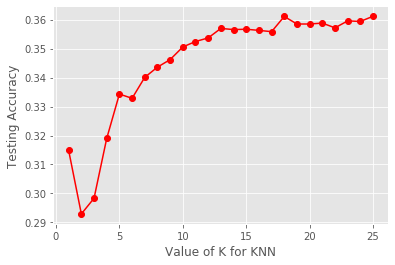

In [53]:
# plot the relationship between K and testing accuracy
from matplotlib import style

style.use("ggplot")
plt.plot(k_range, scores,'-or')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

plt.show()


**==================================================================**

>**Final KNN model with K=25**

In [54]:
# create a KNN estimator and pass k=25
k=25
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)

# Predict test data
Y_pred = KNN.predict(X_test)

In [55]:
# Accuracy Evaluation of train and test data

print("Train set Accuracy: {:.2f}".format(KNN.score(X_train,Y_train)))
print("Test set Accuracy: {:.2f}".format(accuracy_score(Y_test, Y_pred)))

Train set Accuracy: 0.42
Test set Accuracy: 0.36


In [56]:
#different accuracy metrix

precision_score = precision_score(Y_test, Y_pred,average='macro')
recall_score = recall_score(Y_test, Y_pred,average='macro')
f1_score = f1_score(Y_test, Y_pred,average='macro')

print( 'Accuracy : {:.2f}'.format(test_score))
print('Precision : {:.2f}'.format(precision_score))
print('Recall: {:.2f}'.format(recall_score))
print('F1: {:.2f}'.format(f1_score))


Accuracy : 0.36
Precision : 0.32
Recall: 0.26
F1: 0.27


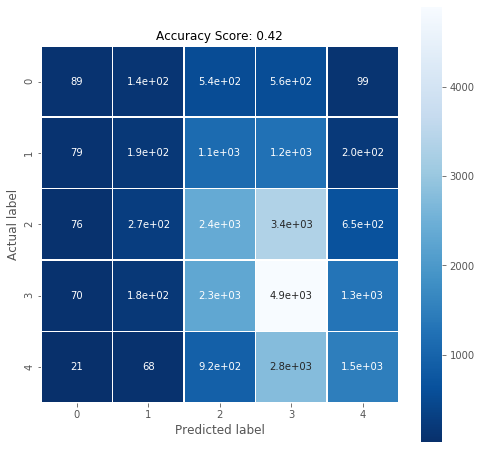

In [60]:
# predict X_test and analyse the confusion metrics for accuracy testing

from sklearn.metrics import confusion_matrix

CM = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(CM, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: {:.2f}'.format(train_score)
plt.title(title, size = 12)
plt.show()